In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder



from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix

In [15]:
#reading the dataset
import pandas as pd
df=pd.read_csv('C:/Users/Kirti/Downloads/Data_Train.csv')
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [16]:
#view the columns of dataset
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [17]:
#checking the shape of dataset
df.shape

(12690, 9)

In [18]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [19]:
#checking the data type 
df.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [20]:
#checking the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [21]:
#checking null values in dataset
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [22]:
#checking unique values in each column
df.nunique()

TITLE              113
RESTAURANT_ID    11892
CUISINES          4155
TIME              2689
CITY               359
LOCALITY          1416
RATING              32
VOTES             1847
COST                86
dtype: int64

# filling the Null values

In [23]:
df['CITY'].fillna("Not known",inplace=True) #filling NaN's in city
df['LOCALITY'].fillna("Not known",inplace=True)
df['VOTES'].fillna("00 votes",inplace=True)
df['RATING'].fillna(df['RATING'].mode()[0],inplace=True)

In [24]:
#see if the Nulls are filled
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

# changing the datatypes

In [25]:
#check unique values in ratings
df.RATING.unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [26]:
#replacing the hypen and 'new' with numeric values
df['RATING']=df['RATING'].replace({'-':3.0,'NEW':3.0})

In [27]:
#rating can be changed into float type
df['RATING']=df['RATING'].astype(float)

# FEATURE ENGINEERING

In [28]:
#splitting title into 2 different columns
df['TITLE 1'] = df["TITLE"].str.split(",").str[0]
df['TITLE 2']=df["TITLE"].str.split(",").str[1]

#dropping 'TITLE' column
df.drop(['TITLE'],axis=1,inplace=True)
df.head()

,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE 1,TITLE 2
0,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,CASUAL DINING,NaN
1,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,CASUAL DINING,BAR
2,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,CASUAL DINING,NaN
3,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,QUICK BITES,NaN
4,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,DESSERT PARLOR,NaN


In [29]:
#check Nulls in title 1
df['TITLE 1'].isnull().sum()

0

In [30]:
#check Nulls in title 2
df['TITLE 2'].isnull().sum()

11208

In [31]:
#filling the null in titile 2 with not known
df['TITLE 2'].fillna("Not Known",inplace=True)

In [32]:
#breaking the votes column for visualization
#splitting votes
df['VOTES']=df['VOTES'].str.split(' ').str[0]
df.head()

,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE 1,TITLE 2
0,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200,CASUAL DINING,Not Known
1,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500,CASUAL DINING,BAR
2,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800,CASUAL DINING,Not Known
3,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800,QUICK BITES,Not Known
4,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300,DESSERT PARLOR,Not Known


In [33]:
#changing data type for votes
df['VOTES']=df['VOTES'].astype(int)

In [34]:
df['VOTES']=df['VOTES'].replace({00:132.0})

# EDA

In [35]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

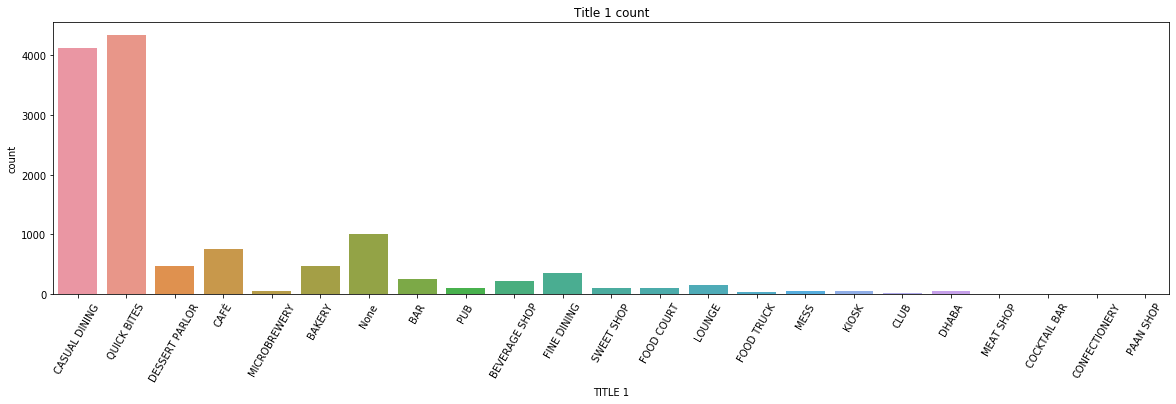

QUICK BITES       4337
CASUAL DINING     4122
None              1003
CAFÉ               749
DESSERT PARLOR     478
BAKERY             463
FINE DINING        350
BAR                254
BEVERAGE SHOP      215
LOUNGE             154
PUB                103
SWEET SHOP         102
FOOD COURT          93
KIOSK               56
MESS                53
DHABA               45
MICROBREWERY        44
FOOD TRUCK          30
CLUB                23
COCKTAIL BAR         6
PAAN SHOP            4
MEAT SHOP            3
CONFECTIONERY        3
Name: TITLE 1, dtype: int64


In [36]:
plt.figure(figsize=(20,5))
sns.countplot(df['TITLE 1'])
plt.xticks(rotation=60)
plt.title("Title 1 count")
plt.show()

print(df['TITLE 1'].value_counts())

observations
Most of the restaurants were quick bites and casual dinings

The records for PAAN SHOP ,MEAT SHOP and CONFECTIONARY were the least

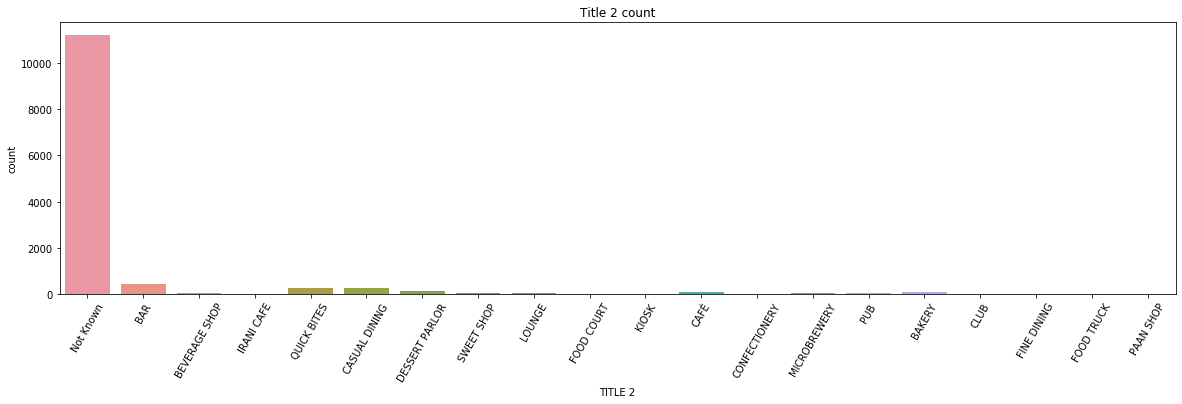

In [37]:
plt.figure(figsize=(20,5))
sns.countplot(df['TITLE 2'])
plt.xticks(rotation=60)
plt.title("Title 2 count")
plt.show()

bar has the most entries

Not Known are the maximum

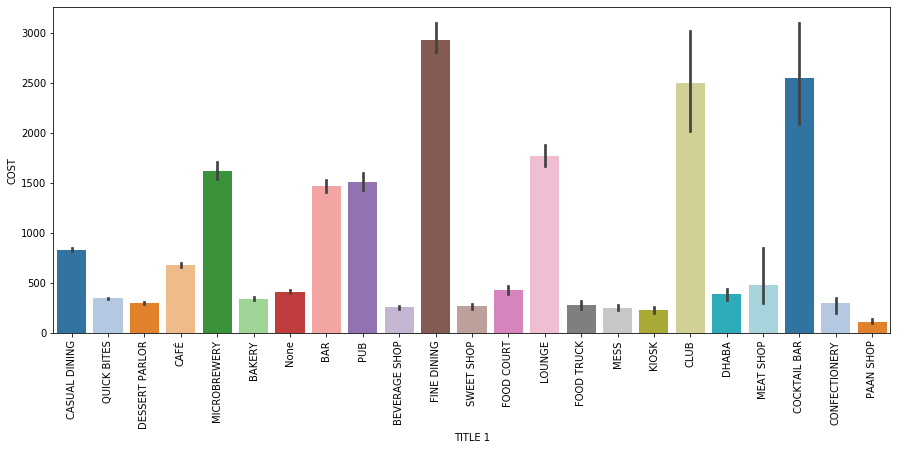

In [38]:
#relationship between fees and profiles
plt.figure(figsize=(15,6))
sns.barplot(y="COST",x="TITLE 1",palette='tab20',data=df)
plt.xticks(rotation=90)
plt.show()

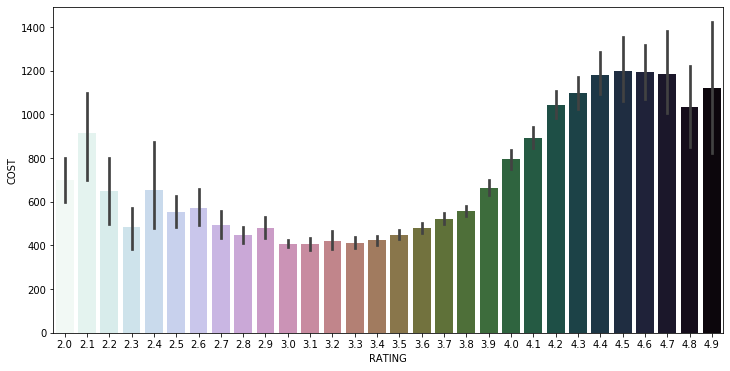

In [39]:
#relationship between RATINGS and COST
plt.figure(figsize=(12,6))
sns.barplot(y="COST",x="RATING",palette='cubehelix_r',data=df)
plt.show()

observations
the restaurants with good ratings were expensive

we can see that when the ratings were above 4 the cost was from 900 to 1400

some restaurants which were rated as 2.1 aslo had high cost

for the ratings from 2.8 to 3.4 the restaurant costs were less

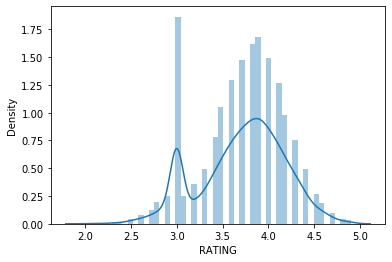

In [40]:
sns.distplot(df['RATING'])
plt.show()

observation
The data is left skewed with skewness =-2.2

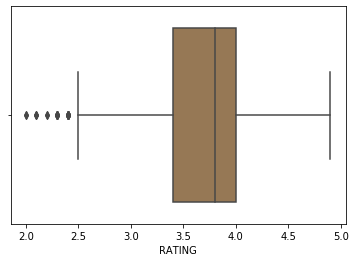

In [41]:
sns.boxplot(df['RATING'],orient='v',palette='cubehelix')
plt.show()

There are outliers present in the rating column

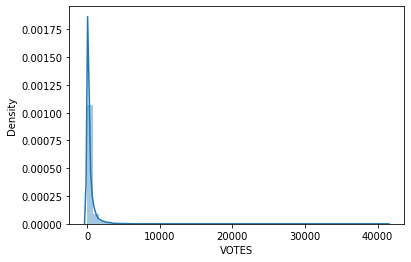

In [42]:
sns.distplot(df['VOTES'])
plt.show()

the data has skewness of 14.522616927774232

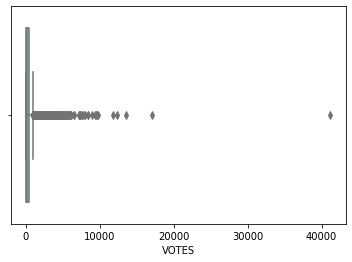

In [43]:
sns.boxplot(df['VOTES'],orient='v',color='lightgreen')
plt.show()

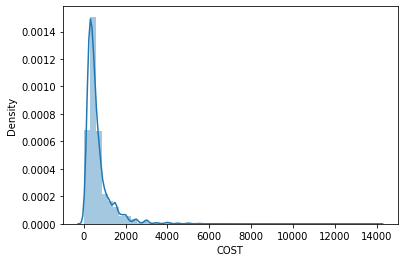

In [44]:
sns.distplot(df['COST'])
plt.show()

observation:
The data is right skewed with skewness = 3.978

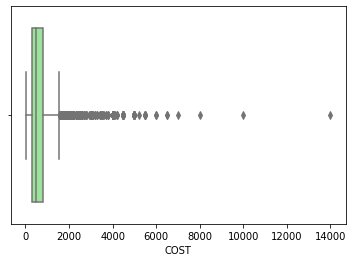

In [45]:
sns.boxplot(df['COST'],orient='v',color='lightgreen')
plt.show()

outliers are present

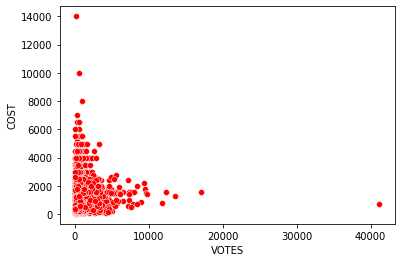

In [46]:
sns.scatterplot(x="VOTES",y='COST',color='r',data=df)
plt.show()

observation

for the votes between 0 to 50,000 the cost was increasing

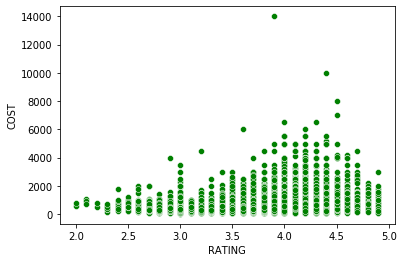

In [47]:
sns.scatterplot(x="RATING",y='COST',color='G',data=df)
plt.show()

observation

the cost for higher ratings are high

data is dense for 3.5 to 5

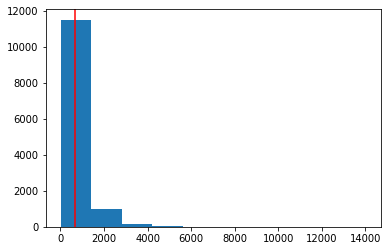

In [48]:
#cost
import numpy as np
plt.hist(df['COST'],bins=10)
mean_value=np.mean(df['COST'])
plt.axvline(mean_value,color='r')
plt.show()

Observation

The maximum cost=1400 and min cost =5

The mean value of cost is 655.2522458628841

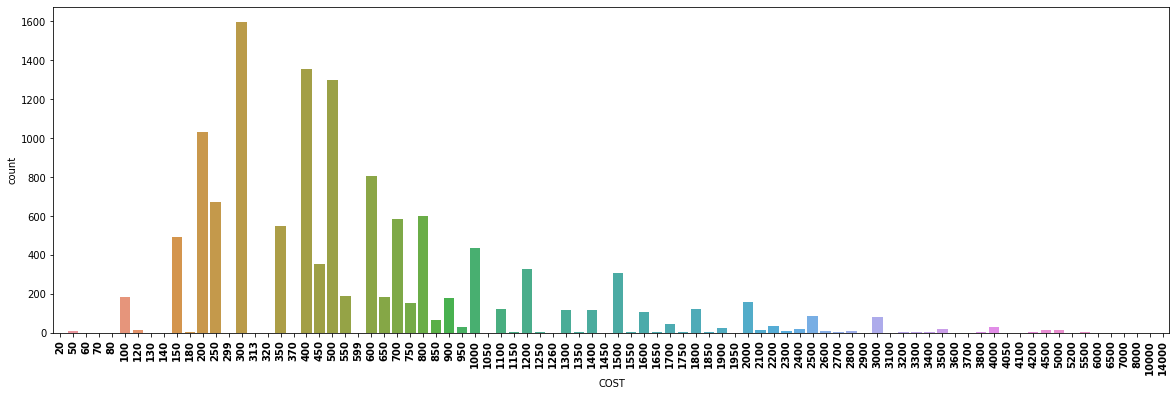

In [49]:
plt.figure(figsize=(20,6))
sns.countplot(df['COST'])
plt.xticks(rotation=90,weight='bold')
plt.show()

observation

About 1600 restaurants costed for Rs 300

Restaurants with cost 400 and 500 were also more( nearly 1400 and 1300 in number )

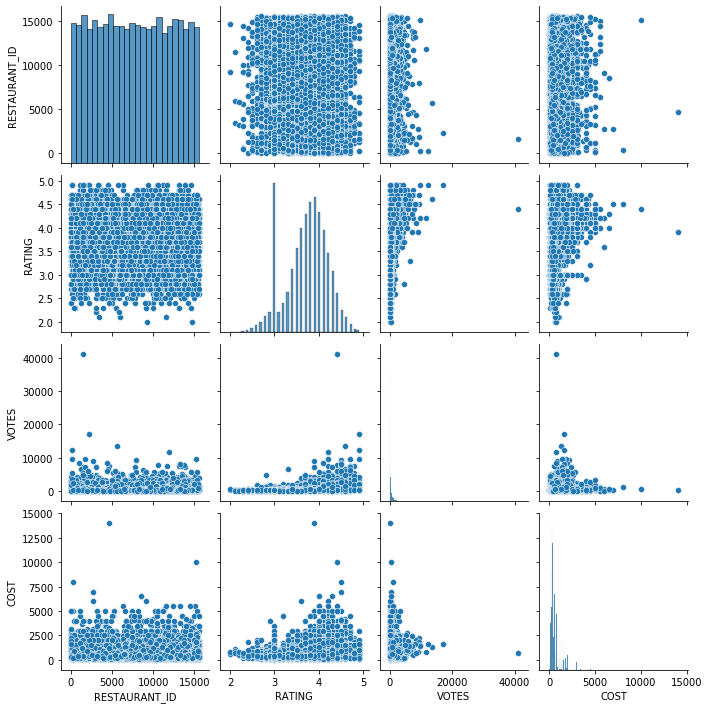

In [50]:
sns.pairplot(df)
plt.show()

restaurant id is irregularly distributed

cost can be seen in bins 

ratings and cost have linear relationship

votes and ratings also show good correlation

# STATISTICAL ANALYSIS

In [51]:
#checking correlation of variables
df.corr()

,RESTAURANT_ID,RATING,VOTES,COST
RESTAURANT_ID,1.000000,0.038031,-0.000272,0.040710
RATING,0.038031,1.000000,0.351515,0.342828
VOTES,-0.000272,0.351515,1.000000,0.252497
COST,0.040710,0.342828,0.252497,1.000000


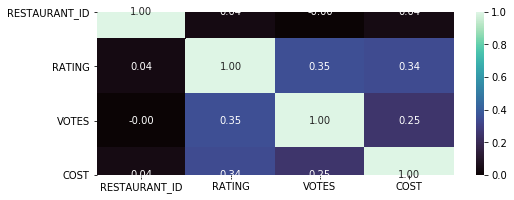

In [52]:
#visualizing the heatmap of correlation
plt.figure(figsize=(8,3))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='mako')
plt.show()

observation

Restaurant_Id has a correlation of 0.04 with target(i.e COST)

RATING has a correlation of 0.34 with target

VOTES have a correlation of 0.26 with target

Therefore votes have the highest correlation while restaurant id has the least

In [53]:
#statistical summary
df.describe()

,RESTAURANT_ID,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000,12690.000000
mean,7759.134121,3.711072,388.755004,655.252246
std,4504.874150,0.462779,806.043968,627.003540
min,0.000000,2.000000,4.000000,20.000000
25%,3863.250000,3.400000,64.000000,300.000000
50%,7740.000000,3.800000,132.000000,500.000000
75%,11688.750000,4.000000,405.000000,800.000000
max,15573.000000,4.900000,41186.000000,14000.000000


Observation

The standard deviation for all features is very high

Rating has the least std deviation

The maximum food cost is 14000 and minimum is 20

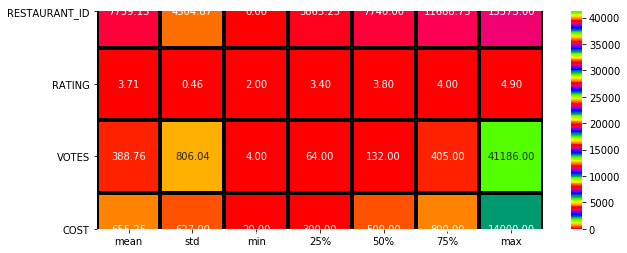

In [54]:
#visualizing the heatmap of correlation
plt.figure(figsize=(10,4))
sns.heatmap(df.describe()[1:].transpose(),annot=True,fmt='.2f',cmap='prism',linewidth=3,linecolor='black')
plt.show()

observations:
1)Restaurant_Id:

mean=7759.13

median=7740.00

std_dev=4504.87

min=0.0

max=15573
2)Rating:

mean=3.17

median=3.80

std_dev=0.46

min=2.00

max=4.90
3)Votes:

mean=388.76

median=132.00

std_dev=806.95

min=4.00

max=4186
4)Cost:

mean=6.55

median=500

std_dev=627.00

min=20.00

max=14000

# As we can see 'RESTAURANT ID ' wont affect our target variable so we can drop it

In [55]:
df.drop(['RESTAURANT_ID'],axis=1,inplace=True)

# Splitting some features

In [56]:
#splitting cuisines
df['CUISINES'].str.split(",",expand=True)

,0,1,2,3,4,5,6,7
0,Malwani,Goan,North Indian,None,None,None,None,None
1,Asian,Modern Indian,Japanese,None,None,None,None,None
2,North Indian,Chinese,Biryani,Hyderabadi,None,None,None,None
3,Tibetan,Chinese,None,None,None,None,None,None
4,Desserts,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
12685,North Indian,Burger,Kebab,None,None,None,None,None
12686,Goan,Continental,None,None,None,None,None,None
12687,Finger Food,Continental,Asian,Chinese,None,None,None,None
12688,North Indian,South Indian,Chinese,Street Food,None,None,None,None


In [57]:
#assinging names to the spiltted columns
split_cuisines = df["CUISINES"].str.split(",", expand = True)
df["CUISINE 1"] = split_cuisines[0]
df["CUISINE 2"] = split_cuisines[1]
df["CUISINE 3"] = split_cuisines[2]
df["CUISINE 4"] = split_cuisines[3]
df["CUISINE 5"] = split_cuisines[4]
df["CUISINE 6"] = split_cuisines[5]
df["CUISINE 7"] = split_cuisines[6]
df["CUISINE 8"] = split_cuisines[7]

In [58]:
df.drop(columns =["CUISINES"],axis=1, inplace = True)
df.head()

,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE 1,TITLE 2,CUISINE 1,CUISINE 2,CUISINE 3,CUISINE 4,CUISINE 5,CUISINE 6,CUISINE 7,CUISINE 8
0,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200,CASUAL DINING,Not Known,Malwani,Goan,North Indian,None,None,None,None,None
1,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,None,None,None,None,None
2,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800,CASUAL DINING,Not Known,North Indian,Chinese,Biryani,Hyderabadi,None,None,None,None
3,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800,QUICK BITES,Not Known,Tibetan,Chinese,None,None,None,None,None,None
4,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300,DESSERT PARLOR,Not Known,Desserts,None,None,None,None,None,None,None


In [59]:
df.isnull().sum() # out of the total 12690

TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
TITLE 1          0
TITLE 2          0
CUISINE 1        0
CUISINE 2     3062
CUISINE 3     6999
CUISINE 4     9995
CUISINE 5    11675
CUISINE 6    12276
CUISINE 7    12514
CUISINE 8    12613
dtype: int64

As the shape of our data is 12690*16 and most of the entries in couisines 4, 5 , 6 , 7 , 8 are Null we can drop these features

In [60]:
df.drop(columns=['CUISINE 4','CUISINE 5','CUISINE 6','CUISINE 7','CUISINE 8'],axis=1,inplace=True)

In [61]:
#filling the remaining Null values

list1=['CUISINE 2','CUISINE 3']
for k in list1:
    df[k].fillna("Not known",inplace=True)

In [62]:
df.isnull().sum()

TIME         0
CITY         0
LOCALITY     0
RATING       0
VOTES        0
COST         0
TITLE 1      0
TITLE 2      0
CUISINE 1    0
CUISINE 2    0
CUISINE 3    0
dtype: int64

In [63]:
df.head()

,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE 1,TITLE 2,CUISINE 1,CUISINE 2,CUISINE 3
0,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200,CASUAL DINING,Not Known,Malwani,Goan,North Indian
1,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese
2,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800,CASUAL DINING,Not Known,North Indian,Chinese,Biryani
3,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800,QUICK BITES,Not Known,Tibetan,Chinese,Not known
4,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300,DESSERT PARLOR,Not Known,Desserts,Not known,Not known


# Splitting the time column into shift one shift two and day

In [64]:
#splitting into shift one
import numpy as np
def extractShiftOne(i):

    timing = "Not available"
    if i is np.nan:
        pass
    else:
        if "," in i:
            timing= i.split(",")[0]
            
        else:
            timing = i.split("(")[0]
            
    return timing

In [65]:
#call the function
df["Shift one"] = df["TIME"].apply(extractShiftOne)

In [66]:
#check the data
df.head()

,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE 1,TITLE 2,CUISINE 1,CUISINE 2,CUISINE 3,Shift one
0,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200,CASUAL DINING,Not Known,Malwani,Goan,North Indian,11am – 4pm
1,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,6pm – 11pm
2,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800,CASUAL DINING,Not Known,North Indian,Chinese,Biryani,11am – 3:30pm
3,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800,QUICK BITES,Not Known,Tibetan,Chinese,Not known,11:30am – 1am
4,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300,DESSERT PARLOR,Not Known,Desserts,Not known,Not known,11am – 1am


# splitting the time into shift 2

In [67]:
#splitting into shift 2
import numpy as np
def extractShiftTwo(i):

    timing = "Not available"
    if i is np.nan:
        pass
    else:
        if "," in i:
            timing= i.split(",")[1].split("(")[0]
       
    return timing

In [68]:
df["Shift Two"] = df["TIME"].apply(extractShiftTwo)

In [69]:
df.head()

,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE 1,TITLE 2,CUISINE 1,CUISINE 2,CUISINE 3,Shift one,Shift Two
0,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200,CASUAL DINING,Not Known,Malwani,Goan,North Indian,11am – 4pm,7:30pm – 11:30pm
1,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,6pm – 11pm,Not available
2,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800,CASUAL DINING,Not Known,North Indian,Chinese,Biryani,11am – 3:30pm,7pm – 11pm
3,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800,QUICK BITES,Not Known,Tibetan,Chinese,Not known,11:30am – 1am,Not available
4,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300,DESSERT PARLOR,Not Known,Desserts,Not known,Not known,11am – 1am,Not available


# extracting days from time

In [70]:
def extractDays(i):

    days = "Not Known"
    if i is np.nan:
        pass
    else:
        if "(" in i:
            days= i.split("(")[-1][0:-1]
    return days

In [71]:
df['Days']=df["TIME"].apply(extractDays)

In [72]:
#dropping the time column
df.drop(['TIME'],axis=1,inplace=True)

In [73]:
df.head()

,CITY,LOCALITY,RATING,VOTES,COST,TITLE 1,TITLE 2,CUISINE 1,CUISINE 2,CUISINE 3,Shift one,Shift Two,Days
0,Thane,Dombivali East,3.6,49.0,1200,CASUAL DINING,Not Known,Malwani,Goan,North Indian,11am – 4pm,7:30pm – 11:30pm,Mon-Sun
1,Chennai,Ramapuram,4.2,30.0,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,6pm – 11pm,Not available,Mon-Sun
2,Chennai,Saligramam,3.8,221.0,800,CASUAL DINING,Not Known,North Indian,Chinese,Biryani,11am – 3:30pm,7pm – 11pm,Mon-Sun
3,Mumbai,Bandra West,4.1,24.0,800,QUICK BITES,Not Known,Tibetan,Chinese,Not known,11:30am – 1am,Not available,Mon-Sun
4,Mumbai,Lower Parel,3.8,165.0,300,DESSERT PARLOR,Not Known,Desserts,Not known,Not known,11am – 1am,Not available,Mon-Sun


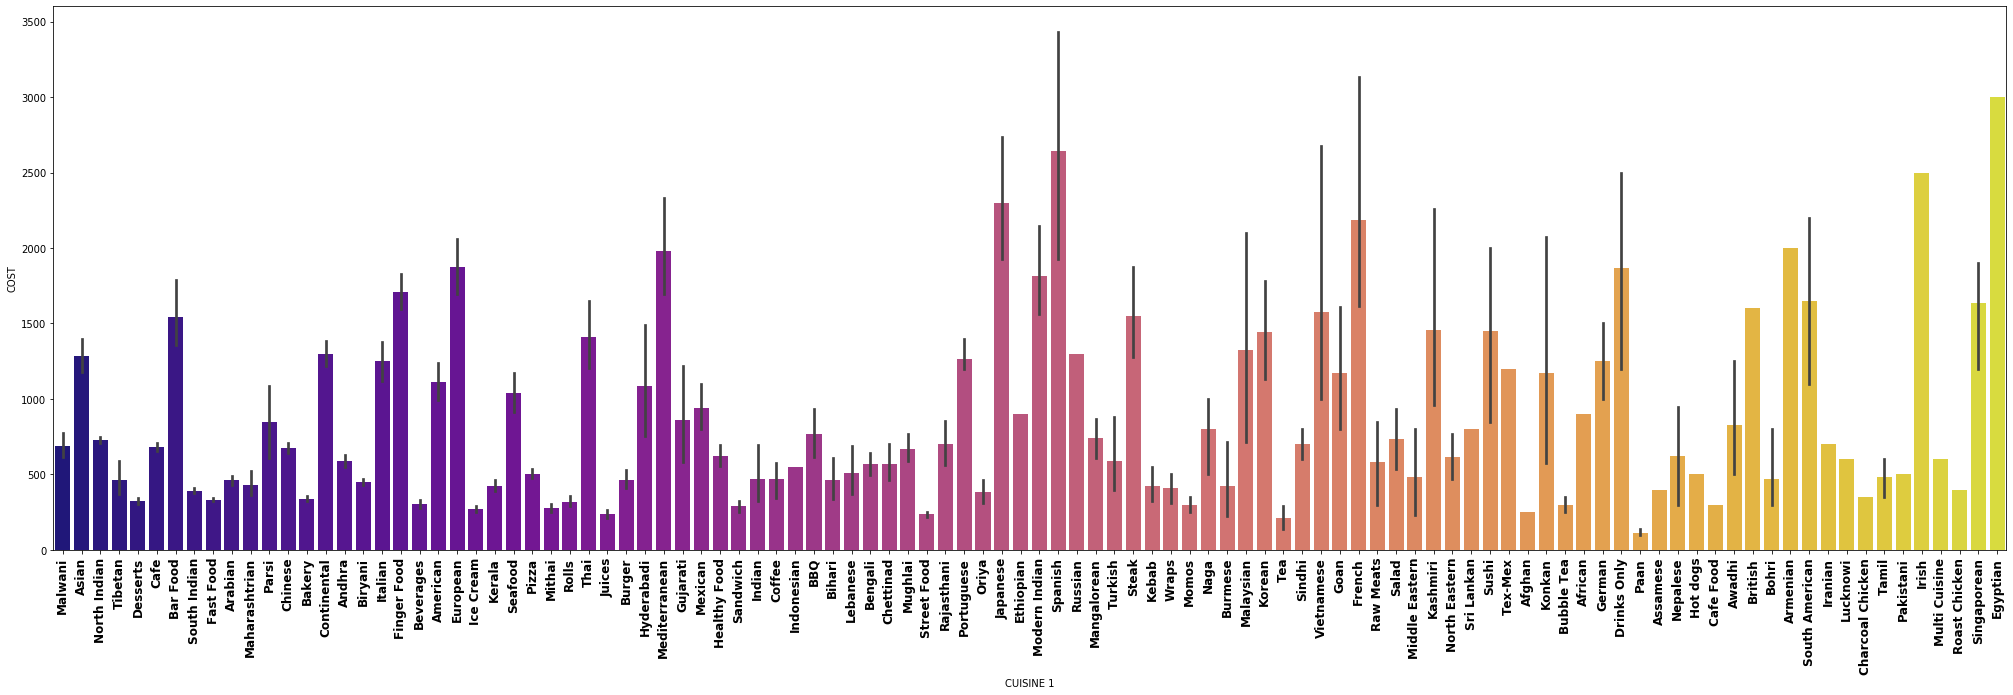

In [74]:
#relationship between cuisine 1 and COST
plt.figure(figsize=(35,10))
sns.barplot(y="COST",x="CUISINE 1",palette='plasma',data=df)
plt.xticks(rotation=90,fontsize=12,weight='bold')
plt.show()

observations

Cuisines with maximum costs were

1)Spanish

2)Japanese

3)French

4)Egtypian

TEA , PAAN , STREET FOOD , AFGHAN, and MOMOS had the least cost of all

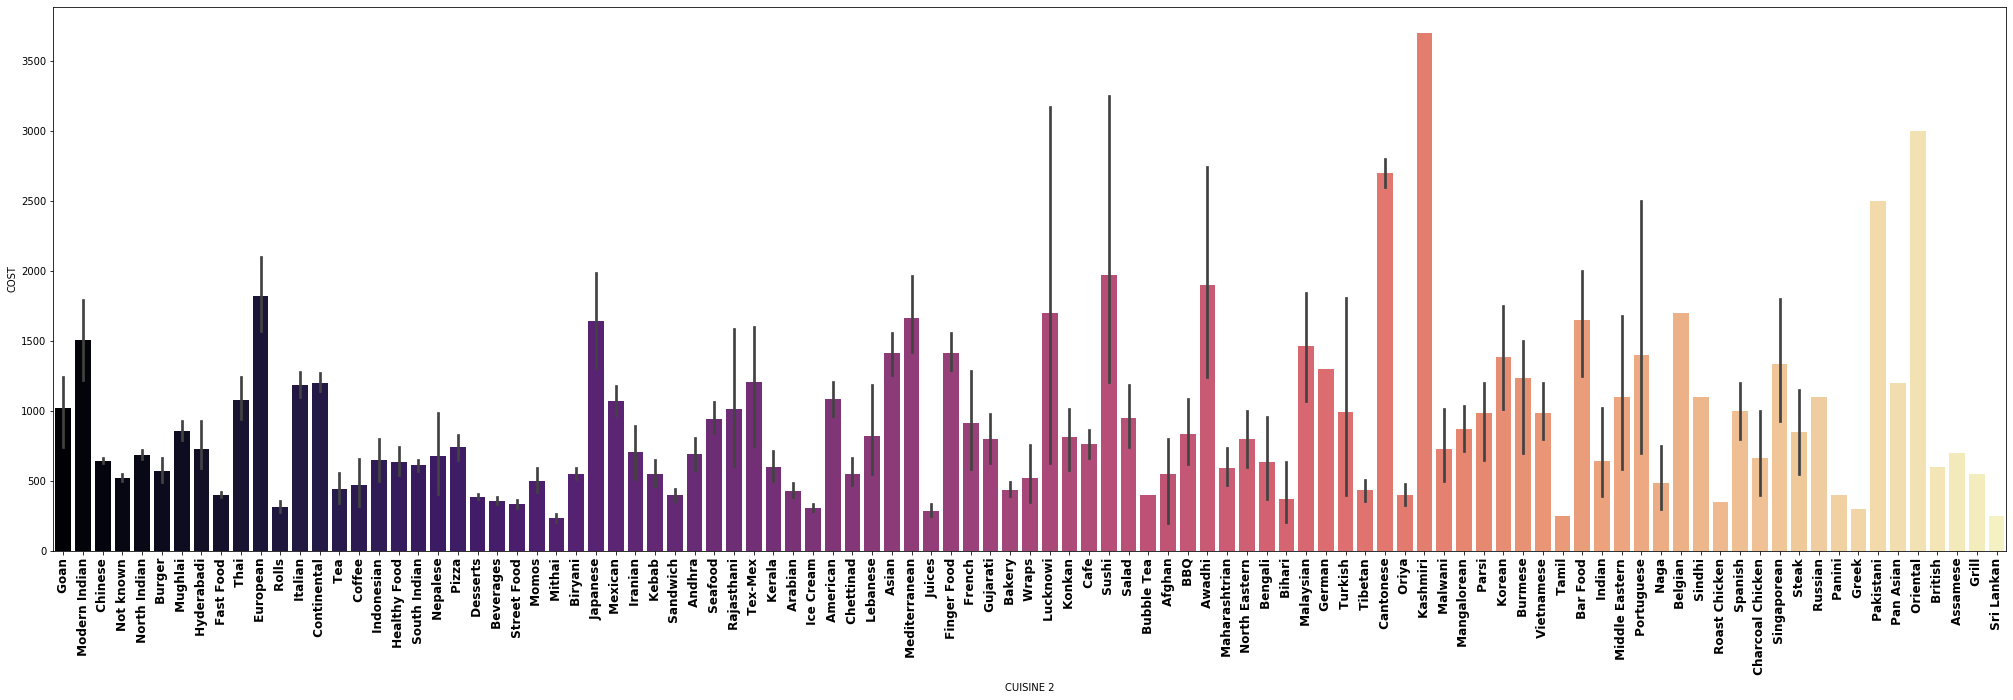

In [75]:
#relationship between cuisine 1 and COST
plt.figure(figsize=(35,10))
sns.barplot(y="COST",x="CUISINE 2",palette='magma',data=df)
plt.xticks(rotation=90,fontsize=12,weight='bold')
plt.show()

Observations

kashmiri has the maximum cost

Sushi and lucknowi had the high cost

Among all cuisine 2 Mithai had the least cost followed by juices and ice creams

In [76]:
df.head()

,CITY,LOCALITY,RATING,VOTES,COST,TITLE 1,TITLE 2,CUISINE 1,CUISINE 2,CUISINE 3,Shift one,Shift Two,Days
0,Thane,Dombivali East,3.6,49.0,1200,CASUAL DINING,Not Known,Malwani,Goan,North Indian,11am – 4pm,7:30pm – 11:30pm,Mon-Sun
1,Chennai,Ramapuram,4.2,30.0,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,6pm – 11pm,Not available,Mon-Sun
2,Chennai,Saligramam,3.8,221.0,800,CASUAL DINING,Not Known,North Indian,Chinese,Biryani,11am – 3:30pm,7pm – 11pm,Mon-Sun
3,Mumbai,Bandra West,4.1,24.0,800,QUICK BITES,Not Known,Tibetan,Chinese,Not known,11:30am – 1am,Not available,Mon-Sun
4,Mumbai,Lower Parel,3.8,165.0,300,DESSERT PARLOR,Not Known,Desserts,Not known,Not known,11am – 1am,Not available,Mon-Sun


# Label encoder

In [77]:
#label encoding the features:
from sklearn.preprocessing import LabelEncoder
list1=['CITY','LOCALITY','TITLE 1','TITLE 2','CUISINE 1', 'CUISINE 2', 'CUISINE 3','Shift one',
       'Shift Two', 'Days']
Le=LabelEncoder()
for i in list1:
    df[i]=Le.fit_transform(df[i])

In [78]:
df.head()

,CITY,LOCALITY,RATING,VOTES,COST,TITLE 1,TITLE 2,CUISINE 1,CUISINE 2,CUISINE 3,Shift one,Shift Two,Days
0,321,285,3.6,49.0,1200,4,15,59,32,66,343,170,356
1,67,1047,4.2,30.0,1500,4,1,6,60,41,943,579,356
2,67,1102,3.8,221.0,800,4,15,72,23,12,327,196,356
3,222,136,4.1,24.0,800,21,15,100,23,93,176,579,356
4,222,620,3.8,165.0,300,8,15,28,98,93,314,579,356


Most of the localities are distributed and do not give much info so we can drop it

In [79]:
df.drop(['LOCALITY'],inplace=True,axis=1)

# Data assignment

In [80]:
#assigning features to x
x=df.drop(["COST"],axis=1)
x.sample()

,CITY,RATING,VOTES,TITLE 1,TITLE 2,CUISINE 1,CUISINE 2,CUISINE 3,Shift one,Shift Two,Days
56,252,3.3,20.0,21,15,47,73,93,567,579,356


In [81]:
x.skew()

CITY          0.235724
RATING       -0.327888
VOTES        14.749632
TITLE 1       0.087325
TITLE 2      -3.057865
CUISINE 1     0.026008
CUISINE 2     0.055174
CUISINE 3    -0.823537
Shift one     0.634927
Shift Two    -1.503723
Days         -3.131280
dtype: float64

In [82]:
from sklearn.preprocessing import power_transform
x['VOTES']=power_transform(x[['VOTES']],method='yeo-johnson')

In [83]:
#see if the skew is reduced
x.skew()

CITY         0.235724
RATING      -0.327888
VOTES        0.000882
TITLE 1      0.087325
TITLE 2     -3.057865
CUISINE 1    0.026008
CUISINE 2    0.055174
CUISINE 3   -0.823537
Shift one    0.634927
Shift Two   -1.503723
Days        -3.131280
dtype: float64

In [84]:
#assigning Target
y=df["COST"]
y.sample()

8249    250
Name: COST, dtype: int64

# finding best random state

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.30)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state i=",i)
        print("for random state",i)
        print("the train accuray is",r2_score(y_train,pred_train)*100)
        print("the testing accuray is",r2_score(y_test,pred_test)*100)
        print("\n")

At random state i= 63
for random state 63
the train accuray is 24.321423154694553
the testing accuray is 24.262573309147818




# Data split

In [86]:
#splitting the data using best obtained random state
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=63)

# Importing require libraries

In [87]:
#importing necessary libraries

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

#regularization models
from sklearn.linear_model import Lasso,Ridge,ElasticNet

#bossting/ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score

# Model Building

In [88]:
#checking for various algorithms using loop

models=[LinearRegression(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet()]

for i in models:
    i.fit(x_train,y_train)
    pred_y=i.predict(x_test)
    print("*)",i,"algorithm")
    print("r2 score is (test)=",(r2_score(y_test,pred_y)*100))
    cross_score=cross_val_score(i,x,y,cv=5).mean()*100
    print("cross validation score is",cross_score)
    print("mean absolute error=",mean_absolute_error(y_test,pred_y))
    print("mean squared error=",mean_squared_error(y_test,pred_y))
    print("Root mean square error=",np.sqrt(mean_squared_error(y_test,pred_y)))
    print('\n')
    print("--------------------------------------------------------------------")

*) LinearRegression() algorithm
r2 score is (test)= 24.262573309147818
cross validation score is 24.292042271837833
mean absolute error= 310.6528016396403
mean squared error= 284886.7725668914
Root mean square error= 533.7478548592878


--------------------------------------------------------------------
*) DecisionTreeRegressor() algorithm
r2 score is (test)= 48.836999086425536
cross validation score is 43.1185223145619
mean absolute error= 252.11995446983624
mean squared error= 192449.92656801798
Root mean square error= 438.69115168648887


--------------------------------------------------------------------
*) SVR() algorithm
r2 score is (test)= -4.496770756310742
cross validation score is -4.474857617036352
mean absolute error= 344.2393737190772
mean squared error= 393065.2131335666
Root mean square error= 626.9491312168528


--------------------------------------------------------------------
*) KNeighborsRegressor() algorithm
r2 score is (test)= 17.729480560056864
cross validatio

# Ensemble techniques

In [89]:
#checking model performance for ensemble techniques

ensemble_models=[RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in ensemble_models:
    m.fit(x_train,y_train)
    pred_y=m.predict(x_test)
    print("*",m,"algorithm")
    print("r2 score is",(r2_score(y_test,pred_y)*100))
    cross_score=cross_val_score(m,x,y,cv=5).mean()*100
    print("cross validation score is",cross_score)
    print("mean absolute error=",mean_absolute_error(y_test,pred_y))
    print("mean squared error=",mean_squared_error(y_test,pred_y))
    print("Root mean square error=",np.sqrt(mean_squared_error(y_test,pred_y)))
    print('\n')
    

* RandomForestRegressor() algorithm
r2 score is 72.49765366595562
cross validation score is 71.31336962370298
mean absolute error= 190.81868098505413
mean squared error= 103450.23626303277
Root mean square error= 321.6368080040479


* AdaBoostRegressor() algorithm
r2 score is -20.844303925578124
cross validation score is -40.65910562178888
mean absolute error= 481.54056923235294
mean squared error= 454556.55456813506
Root mean square error= 674.2080944101273


* GradientBoostingRegressor() algorithm
r2 score is 70.50076578008617
cross validation score is 69.72900848319183
mean absolute error= 199.46733927816186
mean squared error= 110961.54170129873
Root mean square error= 333.10890366560113




# linear regression

In [90]:
Lr=LinearRegression()
Lr.fit(x_train,y_train)
y_pred_Lr=Lr.predict(x_test)
Lr_score=r2_score(y_test,y_pred_Lr)*100
print("r2 score for test =",Lr_score)
Lr_crossval=cross_val_score(Lr,x,y,cv=5).mean()*100
print("cross_validation score=",Lr_crossval)
print('\n')
print("errors")
print('\n')
print("mean absolute error=",mean_absolute_error(y_test,pred_y))
print("mean squared error=",mean_squared_error(y_test,pred_y))
print("Root mean square error=",np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score for test = 24.262573309147818
cross_validation score= 24.292042271837833


errors


mean absolute error= 199.46733927816186
mean squared error= 110961.54170129873
Root mean square error= 333.10890366560113


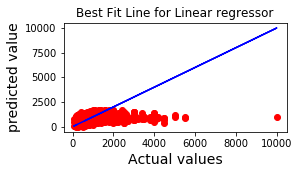

In [91]:
plt.figure(figsize=(4,2))
plt.scatter(x=y_test,y=y_pred_Lr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual values",fontsize=14)
plt.ylabel('predicted value',fontsize=14)
plt.title("Best Fit Line for Linear regressor")
plt.show()

# Random Forest

In [92]:
#model has been built after hypertunning it the code is not mentioned as it took large time to execute
Rf=RandomForestRegressor(criterion='mse',n_estimators=20,max_features='sqrt',random_state=46)
Rf.fit(x_train,y_train)
y_pred=Rf.predict(x_test)
Rf_score=r2_score(y_test,y_pred)*100
print("accuracy(r2)=",Rf_score)
Rf_crossval=cross_val_score(Rf,x,y,cv=5).mean()*100
print("cross_validation score=",Rf_crossval)
print('\n')
print("errors")
print('\n')
print("mean absolute error=",mean_absolute_error(y_test,pred_y))
print("mean squared error=",mean_squared_error(y_test,pred_y))
print("Root mean square error=",np.sqrt(mean_squared_error(y_test,pred_y)))

accuracy(r2)= 70.98775961538175
cross_validation score= 68.73943343820477


errors


mean absolute error= 199.46733927816186
mean squared error= 110961.54170129873
Root mean square error= 333.10890366560113


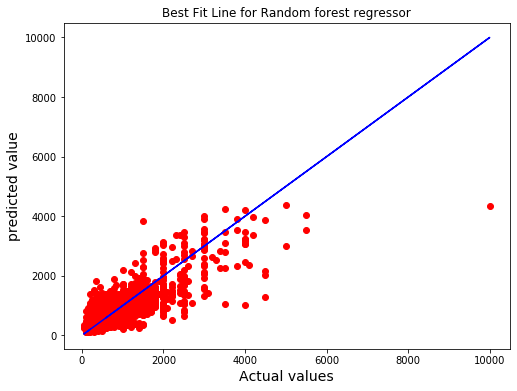

In [93]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual values",fontsize=14)
plt.ylabel('predicted value',fontsize=14)
plt.title("Best Fit Line for Random forest regressor")
plt.show()

# comparing both the models

In [94]:
summary=pd.DataFrame({'Algorithm':['Linear Regression','Random Forest regressor'],
                    'R2 score':[Lr_score,Rf_score],
                     'Cross validataion':[Lr_crossval,Rf_crossval]})
summary

,Algorithm,R2 score,Cross validataion
0,Linear Regression,24.262573,24.292042
1,Random Forest regressor,70.987760,68.739433


# Saving the best model

In [95]:
import pickle
filename="Restaurants-cost.pkl"
pickle.dump(Rf,open(filename,'wb'))

In [96]:
actual=np.array(y_test)
predicted=np.array(Rf.predict(x_test))

In [97]:
df_com=pd.DataFrame({"actual values":actual,"predicted values":predicted})
df_com

,actual values,predicted values
0,600,492.500000
1,1200,892.500000
2,200,222.500000
3,250,295.000000
4,800,737.500000
...,...,...
3802,200,385.000000
3803,1800,1190.000000
3804,300,240.000000
3805,1300,1605.000000


# Test data

In [98]:
#reading the dataset
import pandas as pd
df_test=pd.read_csv('C:/Users/Kirti/Downloads/Data_Test.csv')
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [99]:
#view the columns of dataset
df_test.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

There are 8 colums as 'TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES'

In [100]:
#checking the shape of dataset
df_test.shape

(4231, 8)

In [101]:
#checking the data type 
df_test.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

Only 'RESTAURANT_ID' is integer type rest of the columns are object datatype

In [102]:
#checking the info of dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [103]:
#checking null values in dataset
df_test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [104]:
#checking unique values in each column
df_test.nunique()

TITLE              86
RESTAURANT_ID    4127
CUISINES         1727
TIME             1183
CITY              151
LOCALITY          834
RATING             31
VOTES            1136
dtype: int64

# filling the Null values

There are 35 Null values in city

There are 30 Null values in locality

2 in ratings

402 NaN in votes

In [105]:
df_test['CITY'].fillna("Not known",inplace=True) #filling NaN's in city
df_test['LOCALITY'].fillna("Not known",inplace=True)
df_test['VOTES'].fillna("00 votes",inplace=True)
df_test['RATING'].fillna(df_test['RATING'].mode()[0],inplace=True)

In [106]:
#see if the Nulls are filled
df_test.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

In [107]:
df_test.RATING.unique()

array(['4.3', '4.2', '3.8', '3.6', '3.7', 'NEW', '4', '3.4', '3.2', '4.1',
       '3', '-', '3.5', '4.5', '3.9', '3.3', '2.9', '3.1', '2.5', '2.8',
       '4.6', '4.4', '2.7', '4.8', '2.6', '4.9', '2.1', '4.7', '2.3',
       '2.4', '2.2'], dtype=object)

In [108]:
df_test['RATING']=df_test['RATING'].replace({'-':3.0,'NEW':3.0})

In [109]:
#rating can be changed into float type
df_test['RATING']=df_test['RATING'].astype(float)

# FEATURE ENGINEERING

In [110]:
#splitting the titles into 2 columns
df_test['TITLE 1'] = df_test["TITLE"].str.split(",").str[0]
df_test['TITLE 2']=df_test["TITLE"].str.split(",").str[1]

#dropping 'TITLE' column
df_test.drop(['TITLE'],axis=1,inplace=True)
df_test.head()

,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,TITLE 1,TITLE 2
0,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,CASUAL DINING,NaN
1,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,QUICK BITES,NaN
2,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes,CASUAL DINING,NaN
3,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes,None,NaN
4,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes,QUICK BITES,NaN


In [111]:
#check Nulls in title 2
df_test['TITLE 2'].isnull().sum()

3769

In [112]:
#filling the null in titile 2 with not known
df_test['TITLE 2'].fillna("Not Known",inplace=True)

In [113]:
#breaking the votes column for visualization
df_test['VOTES']=df_test['VOTES'].str.split(' ').str[0]
df_test.head()

,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,TITLE 1,TITLE 2
0,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564,CASUAL DINING,Not Known
1,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61,QUICK BITES,Not Known
2,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350,CASUAL DINING,Not Known
3,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445,None,Not Known
4,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23,QUICK BITES,Not Known


In [114]:
#changing data type for votes
df_test['VOTES']=df_test['VOTES'].astype(int)

In [115]:
df_test['VOTES']=df_test['VOTES'].replace({00:132.0})

# As we can see 'RESTAURANT ID ' wont affect our target variable so we can drop it

In [116]:
df_test.drop(['RESTAURANT_ID'],axis=1,inplace=True)

In [117]:
#splitting cuisines
df_test['CUISINES'].str.split(",",expand=True)

,0,1,2,3,4,5,6,7
0,North Indian,Chinese,Mughlai,Kebab,None,None,None,None
1,South Indian,Fast Food,Pizza,North Indian,None,None,None,None
2,North Indian,Seafood,Biryani,Chinese,None,None,None,None
3,Biryani,None,None,None,None,None,None,None
4,South Indian,Kerala,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
4226,North Indian,Mughlai,Chinese,None,None,None,None,None
4227,Biryani,North Indian,Sandwich,Salad,Wraps,None,None,None
4228,Continental,North Indian,None,None,None,None,None,None
4229,Rolls,Beverages,None,None,None,None,None,None


In [118]:
#assinging names to the spiltted columns
split_cuisines = df_test["CUISINES"].str.split(",", expand = True)
df_test["CUISINE 1"] = split_cuisines[0]
df_test["CUISINE 2"] = split_cuisines[1]
df_test["CUISINE 3"] = split_cuisines[2]
df_test["CUISINE 4"] = split_cuisines[3]
df_test["CUISINE 5"] = split_cuisines[4]
df_test["CUISINE 6"] = split_cuisines[5]
df_test["CUISINE 7"] = split_cuisines[6]
df_test["CUISINE 8"] = split_cuisines[7]

In [119]:
df_test.drop(columns =["CUISINES"],axis=1, inplace = True)
df_test.head()

,TIME,CITY,LOCALITY,RATING,VOTES,TITLE 1,TITLE 2,CUISINE 1,CUISINE 2,CUISINE 3,CUISINE 4,CUISINE 5,CUISINE 6,CUISINE 7,CUISINE 8
0,12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564.0,CASUAL DINING,Not Known,North Indian,Chinese,Mughlai,Kebab,None,None,None,None
1,7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61.0,QUICK BITES,Not Known,South Indian,Fast Food,Pizza,North Indian,None,None,None,None
2,11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350.0,CASUAL DINING,Not Known,North Indian,Seafood,Biryani,Chinese,None,None,None,None
3,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445.0,None,Not Known,Biryani,None,None,None,None,None,None,None
4,11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23.0,QUICK BITES,Not Known,South Indian,Kerala,None,None,None,None,None,None


In [120]:
df_test.isnull().sum()

TIME            0
CITY            0
LOCALITY        0
RATING          0
VOTES           0
TITLE 1         0
TITLE 2         0
CUISINE 1       0
CUISINE 2     985
CUISINE 3    2331
CUISINE 4    3314
CUISINE 5    3875
CUISINE 6    4094
CUISINE 7    4157
CUISINE 8    4200
dtype: int64

# Splitting the time column into shift one shift two and day

In [121]:
df_test.drop(columns=['CUISINE 4','CUISINE 5','CUISINE 6','CUISINE 7','CUISINE 8'],axis=1,inplace=True)

In [122]:
#filling the remaining Null values

list1=['CUISINE 2','CUISINE 3']
for k in list1:
    df_test[k].fillna("Not known",inplace=True)

In [123]:
df_test.isnull().sum()

TIME         0
CITY         0
LOCALITY     0
RATING       0
VOTES        0
TITLE 1      0
TITLE 2      0
CUISINE 1    0
CUISINE 2    0
CUISINE 3    0
dtype: int64

In [124]:
#splitting into shift one
import numpy as np
def extractShiftOne(i):

    timing = "Not available"
    if i is np.nan:
        pass
    else:
        if "," in i:
            timing= i.split(",")[0]
            
        else:
            timing = i.split("(")[0]
            
    return timing

In [125]:
#call the function
df_test["Shift one"] = df_test["TIME"].apply(extractShiftOne)

In [126]:
#check the data
df_test.head()

,TIME,CITY,LOCALITY,RATING,VOTES,TITLE 1,TITLE 2,CUISINE 1,CUISINE 2,CUISINE 3,Shift one
0,12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564.0,CASUAL DINING,Not Known,North Indian,Chinese,Mughlai,12noon – 12midnight
1,7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61.0,QUICK BITES,Not Known,South Indian,Fast Food,Pizza,7am – 12:30AM
2,11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350.0,CASUAL DINING,Not Known,North Indian,Seafood,Biryani,11am – 11:30pm
3,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445.0,None,Not Known,Biryani,Not known,Not known,9am – 10pm (Mon
4,11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23.0,QUICK BITES,Not Known,South Indian,Kerala,Not known,11am – 10pm


# splitting into shift 2

In [127]:
#splitting into shift 2
import numpy as np
def extractShiftTwo(i):

    timing = "Not available"
    if i is np.nan:
        pass
    else:
        if "," in i:
            timing= i.split(",")[1].split("(")[0]
       
    return timing

In [128]:
df_test["Shift Two"] = df_test["TIME"].apply(extractShiftTwo)

In [129]:
df_test.head()

,TIME,CITY,LOCALITY,RATING,VOTES,TITLE 1,TITLE 2,CUISINE 1,CUISINE 2,CUISINE 3,Shift one,Shift Two
0,12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564.0,CASUAL DINING,Not Known,North Indian,Chinese,Mughlai,12noon – 12midnight,Not available
1,7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61.0,QUICK BITES,Not Known,South Indian,Fast Food,Pizza,7am – 12:30AM,Not available
2,11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350.0,CASUAL DINING,Not Known,North Indian,Seafood,Biryani,11am – 11:30pm,Not available
3,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445.0,None,Not Known,Biryani,Not known,Not known,9am – 10pm (Mon,Wed
4,11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23.0,QUICK BITES,Not Known,South Indian,Kerala,Not known,11am – 10pm,Not available


# extracting days from time

In [130]:
def extractDays(i):

    days = "Not Known"
    if i is np.nan:
        pass
    else:
        if "(" in i:
            days= i.split("(")[-1][0:-1]
    return days

In [131]:
df_test['Days']=df_test["TIME"].apply(extractDays)

In [132]:
#dropping the time column
df_test.drop(['TIME'],axis=1,inplace=True)

In [133]:
df_test.head()

,CITY,LOCALITY,RATING,VOTES,TITLE 1,TITLE 2,CUISINE 1,CUISINE 2,CUISINE 3,Shift one,Shift Two,Days
0,Noida,Sector 18,4.3,564.0,CASUAL DINING,Not Known,North Indian,Chinese,Mughlai,12noon – 12midnight,Not available,Mon-Sun
1,Mumbai,Grant Road,4.2,61.0,QUICK BITES,Not Known,South Indian,Fast Food,Pizza,7am – 12:30AM,Not available,Mon-Sun
2,Mumbai,Marine Lines,3.8,350.0,CASUAL DINING,Not Known,North Indian,Seafood,Biryani,11am – 11:30pm,Not available,Mon-Sun
3,Faridabad,NIT,3.8,1445.0,None,Not Known,Biryani,Not known,Not known,9am – 10pm (Mon,Wed,"Mon, Wed, Thu, Fri, Sat, Sun), 10:39am.."
4,Kochi,Kaloor,3.6,23.0,QUICK BITES,Not Known,South Indian,Kerala,Not known,11am – 10pm,Not available,Mon-Sun


# Label encoder

In [134]:
#label encoding the features:
from sklearn.preprocessing import LabelEncoder
list1=['CITY','LOCALITY','TITLE 1','TITLE 2','CUISINE 1', 'CUISINE 2', 'CUISINE 3', 'Shift one',
       'Shift Two', 'Days']
Le=LabelEncoder()
for i in list1:
    df_test[i]=Le.fit_transform(df_test[i])

In [135]:
df_test.head()

,CITY,LOCALITY,RATING,VOTES,TITLE 1,TITLE 2,CUISINE 1,CUISINE 2,CUISINE 3,Shift one,Shift Two,Days
0,110,663,4.3,564.0,5,13,60,19,56,297,315,137
1,96,221,4.2,61.0,22,13,73,24,61,592,315,137
2,96,411,3.8,350.0,5,13,60,69,13,144,315,137
3,41,456,3.8,1445.0,19,13,12,81,80,720,129,93
4,78,300,3.6,23.0,22,13,73,42,80,139,315,137


In [136]:
df_test.drop(['LOCALITY'],inplace=True,axis=1)

In [137]:
df_test.skew()

CITY         0.065922
RATING      -0.357174
VOTES        7.148179
TITLE 1      0.078593
TITLE 2     -3.239490
CUISINE 1   -0.047693
CUISINE 2    0.019973
CUISINE 3   -0.872745
Shift one    0.563887
Shift Two   -1.577172
Days        -2.374634
dtype: float64

In [138]:
from sklearn.preprocessing import power_transform
df_test['VOTES']=power_transform(df_test[['VOTES']],method='yeo-johnson')

# using the saved model to make predictions

In [139]:
saved_model=pickle.load(open("Restaurants-cost.pkl",'rb'))

In [140]:
saved_model

RandomForestRegressor(criterion='mse', max_features='sqrt', n_estimators=20,
                      random_state=46)

In [141]:
predictions=saved_model.predict(df_test)
predictions

array([1385. ,  467.5,  872.5, ...,  452.5,  487.5,  487.5])

In [142]:
prediction=pd.DataFrame(predictions)
prediction

,0
0,1385.0
1,467.5
2,872.5
3,942.5
4,420.0
...,...
4226,972.5
4227,912.5
4228,452.5
4229,487.5


# CONCLUSION
Thus i have checked the model performance using various Regression algorithms like Linear Refression, RandomForest, Adaboost and Gradient Boost ,Ridge, lasso, etc.

Random Forest Regression Algorithm gives us best results and is used to model the train dataset .The trained model is saved

The evaluation metrics of model are as follows:

accuracy(r2)= 70.98775961538175

cross_validation score= 68.73943343820477

mean absolute error= 199.46733927816186

mean squared error= 110961.54170129872

Root mean square error= 333.1089036656011

The saved model is then used to make predictions on the test data set

# ALSO WE CAN USE A CLASSIFICATION ALGORITHM TO PREDICT THE TARGET AS WE HAVE ONLY 80 DISTINCT VALUES WHICH ARE DISCRETE

Performing classification on the targert x

In [143]:
x

,CITY,RATING,VOTES,TITLE 1,TITLE 2,CUISINE 1,CUISINE 2,CUISINE 3,Shift one,Shift Two,Days
0,321,3.6,-0.860943,4,15,59,32,66,343,170,356
1,67,4.2,-1.222553,4,1,6,60,41,943,579,356
2,67,3.8,0.254049,4,15,72,23,12,327,196,356
3,222,4.1,-1.385919,21,15,100,23,93,176,579,356
4,222,3.8,0.038106,8,15,28,98,93,314,579,356
...,...,...,...,...,...,...,...,...,...,...,...
12685,131,3.8,0.919394,21,15,72,17,44,522,228,226
12686,222,4.3,1.502516,4,1,37,25,93,537,322,277
12687,239,4.0,0.998157,14,15,34,25,4,518,579,356
12688,67,3.5,-1.175147,4,15,72,84,21,904,579,356


In [144]:
y

0        1200
1        1500
2         800
3         800
4         300
         ... 
12685     500
12686    1800
12687    1300
12688     400
12689     600
Name: COST, Length: 12690, dtype: int64

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

best_rstate=0
accu=0

for i in range(0,400):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    kn=KNeighborsClassifier()
    kn.fit(x_train,y_train)
    y_pred=kn.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
   
    
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
       
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate)) 
print("cross validation score is ",cross_val_score(kn,x,y,cv=5).mean()*100)

Best accuracy is  30.0 found on random state 283
cross validation score is  10.614657210401893


In [146]:
#using the best random state found to split the data for test and train 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=283)

In [147]:
#importing libraries required for modelling

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#boosting models

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier


#evaluation metrics
from sklearn.metrics import confusion_matrix,classification_report

In [148]:
models=[DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),SVC(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),
       BaggingClassifier(),ExtraTreesClassifier()]
for i in models:
    i.fit(x_train,y_train)
    i.score(x_train,y_train)
    y_pred=i.predict(x_test)
    print("accuracy score of ",i,"=",accuracy_score(y_test,y_pred)*100)
    print("cross validation score =",cross_val_score(i,x,y,cv=5).mean()*100)
    print(("difference=",(accuracy_score(y_test,y_pred)*100)-(cross_val_score(i,x,y,cv=5).mean()*100)))
    print("\n")

accuracy score of  DecisionTreeClassifier() = 12.739690044654584
cross validation score = 12.86052009456265
('difference=', -0.3178355660625165)


accuracy score of  KNeighborsClassifier() = 9.876543209876543
cross validation score = 10.614657210401893
('difference=', -0.7381140005253499)


accuracy score of  GaussianNB() = 3.677436301549777
cross validation score = 2.434988179669031
('difference=', 1.242448121880746)


accuracy score of  SVC() = 13.422642500656684
cross validation score = 13.167848699763592
('difference=', 0.25479380089309167)


accuracy score of  RandomForestClassifier() = 17.52035723666929
cross validation score = 17.525610717100076
('difference=', 0.16023115313895175)


accuracy score of  AdaBoostClassifier() = 15.576569477278698
cross validation score = 14.940898345153663
('difference=', 0.6356711321250348)




KeyboardInterrupt: 

In [ ]:
#using the best parameter obtained above
rfc=RandomForestClassifier(criterion='entropy',max_features="sqrt",n_estimators=90)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
rfc_score=accuracy_score(y_test,y_pred)*100
print("accuracy",rfc_score)
rfc_crossval=cross_val_score(rfc,x,y,cv=5).mean()*100
print("cross_validation score=",rfc_crossval)
print("\n")
print("confusion matrix \n",confusion_matrix(y_test,y_pred))
print("\n")
print("classification report\n",classification_report(y_test,y_pred))

In [ ]:
import pickle
filename="Restaurants_classifier-cost.pkl"
pickle.dump(rfc,open(filename,'wb'))

In [ ]:
actual_1=np.array(y_test)
predicted_1=np.array(rfc.predict(x_test))

In [ ]:
com=pd.DataFrame({"actual values":actual_1,"predicted values":predicted_1})
com